In [196]:
import warnings
warnings.filterwarnings("ignore")

In [197]:
import pandas as pd

train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
sub = pd.read_csv("../input/sample_submission.csv")

In [198]:
train.head(3)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091


In [199]:
test.head(3)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941


In [200]:
xtrain = train.drop(["target"], axis=1)
ytrain = train["target"]
xtest = test

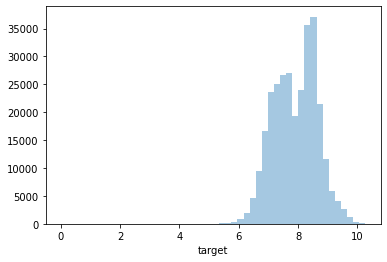

In [201]:
import seaborn as sns
sns.distplot(ytrain, kde=False);

<Figure size 432x288 with 0 Axes>

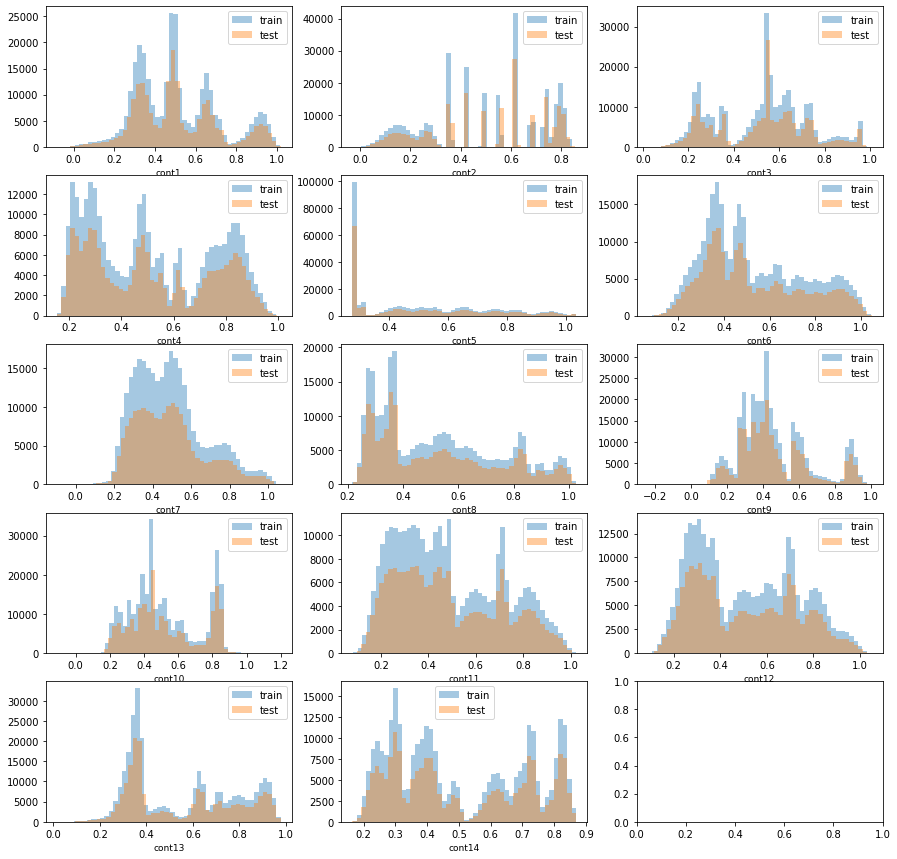

In [202]:
import matplotlib.pyplot as plt
features = [f for f in xtrain if f not in ("id")]

i = 1
plt.figure()
fig, ax = plt.subplots(5,3,figsize=(15,15))
for feat in features:
    plt.subplot(5,3,i)
    sns.distplot(train[feat], kde=False, label="train");
    sns.distplot(test[feat], kde=False, label="test");
    plt.xlabel(feat, fontsize=9);
    plt.legend();
    i += 1

In [203]:
corr = train.corr()
corr

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
id,1.000000,-0.001454,0.000574,0.001609,0.002131,0.001959,-0.001971,-0.000155,0.002112,0.000030,-0.001652,-0.000484,-0.002075,-0.000577,0.001940,0.001347
cont1,-0.001454,1.000000,-0.080170,-0.419712,0.273705,-0.059012,0.698556,0.341478,0.373340,0.794003,0.725040,0.565717,0.600041,0.570382,0.067294,-0.032994
cont2,0.000574,-0.080170,1.000000,0.334487,-0.005533,0.150737,0.023692,0.116222,0.081049,-0.046769,0.035101,0.126024,0.092642,0.017383,0.023972,0.067102
cont3,0.001609,-0.419712,0.334487,1.000000,-0.329131,0.060931,-0.300509,0.106904,-0.309783,-0.406743,-0.289756,-0.075415,-0.103735,-0.386521,-0.065457,0.058936
cont4,0.002131,0.273705,-0.005533,-0.329131,1.000000,0.123526,0.152752,-0.077045,0.324784,0.261927,0.204139,0.063961,0.073291,0.155226,0.054703,0.005522
cont5,0.001959,-0.059012,0.150737,0.060931,0.123526,1.000000,-0.179084,-0.241272,0.010438,-0.071764,-0.102531,-0.222244,-0.192571,-0.140272,0.040552,-0.005358
cont6,-0.001971,0.698556,0.023692,-0.300509,0.152752,-0.179084,1.000000,0.541975,0.415008,0.716613,0.770628,0.737495,0.757105,0.783604,0.067007,0.027955
cont7,-0.000155,0.341478,0.116222,0.106904,-0.077045,-0.241272,0.541975,1.000000,0.150403,0.341759,0.465418,0.672188,0.657310,0.322415,-0.037135,0.067234
cont8,0.002112,0.373340,0.081049,-0.309783,0.324784,0.010438,0.415008,0.150403,1.000000,0.429986,0.362336,0.296598,0.323042,0.475072,0.100645,0.014698
cont9,0.000030,0.794003,-0.046769,-0.406743,0.261927,-0.071764,0.716613,0.341759,0.429986,1.000000,0.725053,0.575095,0.605091,0.628391,0.081992,-0.013029


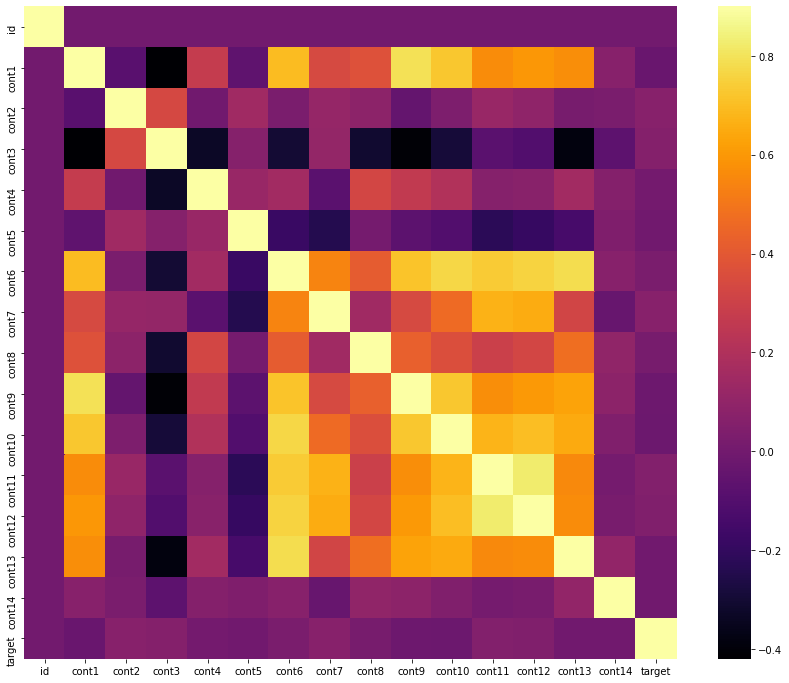

In [204]:
plt.subplots(figsize=(15,12))
sns.heatmap(corr, vmax=0.9, cmap="inferno", square=True);

0.4977, 0.7055
   id    target
0   0  8.030145
1   2  7.847120
2   6  7.934545
3   7  8.161640
4  10  8.207941


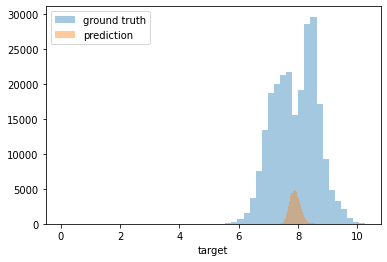

In [205]:
import lightgbm as lgb
from sklearn import model_selection
from sklearn import metrics
import numpy as np
import shap

if __name__ == "__main__":
    X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
        xtrain, 
        ytrain, 
        test_size=0.2,
    )
    X_test = xtest
    
    model = lgb.LGBMRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = metrics.mean_squared_error(y_valid, preds)
    rmse = np.sqrt(metrics.mean_squared_error(y_valid, preds))
    print(f"{mse:.4f}, {rmse:.4f}")
    
    sns.distplot(y_train, kde=False, label="ground truth");
    sns.distplot(preds, kde=False, label="prediction");
    plt.legend()
    
    #explainer = shap.Explainer(model, X_train)
    #shap_values = explainer.shap_values(X_train)
    #shap.summary_plot(shap_values, X_train)
    
    y_test_preds = model.predict(X_test)
    submission = pd.DataFrame()
    submission["id"] = X_test.loc[:,"id"]
    submission["target"] = y_test_preds
    print(submission.head())

In [206]:
from sklearn import mixture

gmm = mixture.GaussianMixture(n_components=2, random_state=42)
gmm.fit(train.target.values.reshape(-1,1))
train["target_class"] = gmm.predict(train.target.values.reshape(-1,1))

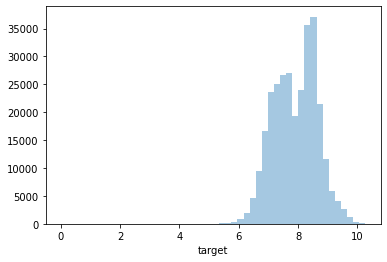

In [207]:
sns.distplot(train["target"], kde=False);

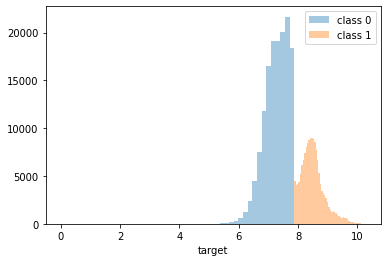

In [208]:
sns.distplot(train[train.target_class==0].target, kde=False, label="class 0");
sns.distplot(train[train.target_class==1].target, kde=False, label="class 1");
plt.legend()

In [209]:
def get_gmm_class_features(feat, n):
    gmm = mixture.GaussianMixture(n_components=n, random_state=42)
    gmm.fit(train[feat].values.reshape(-1,1))
    train[f"{feat}_class"] = gmm.predict(train[feat].values.reshape(-1,1))
    test[f"{feat}_class"] = gmm.predict(test[feat].values.reshape(-1,1))   

In [210]:
get_gmm_class_features("cont1", 4)
get_gmm_class_features("cont2", 10)
get_gmm_class_features("cont3", 6)
get_gmm_class_features("cont4", 4)
get_gmm_class_features("cont5", 3)
get_gmm_class_features("cont6", 2)
get_gmm_class_features("cont7", 3)
get_gmm_class_features("cont8", 4)
get_gmm_class_features("cont9", 4)
get_gmm_class_features("cont10", 8)
get_gmm_class_features("cont11", 5)
get_gmm_class_features("cont12", 4)
get_gmm_class_features("cont13", 6)
get_gmm_class_features("cont14", 6)

In [211]:
train.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'target', 'target_class', 'cont1_class', 'cont2_class', 'cont3_class',
       'cont4_class', 'cont5_class', 'cont6_class', 'cont7_class',
       'cont8_class', 'cont9_class', 'cont10_class', 'cont11_class',
       'cont12_class', 'cont13_class', 'cont14_class'],
      dtype='object')

In [212]:
test.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'cont1_class', 'cont2_class', 'cont3_class', 'cont4_class',
       'cont5_class', 'cont6_class', 'cont7_class', 'cont8_class',
       'cont9_class', 'cont10_class', 'cont11_class', 'cont12_class',
       'cont13_class', 'cont14_class'],
      dtype='object')

In [213]:
xtrain = train.drop(["target", "target_class"], axis=1)
ytrain = train["target"]
xtest = test

0.4934, 0.7025
   id    target
0   0  7.929876
1   2  7.848001
2   6  7.966830
3   7  8.197462
4  10  8.245656


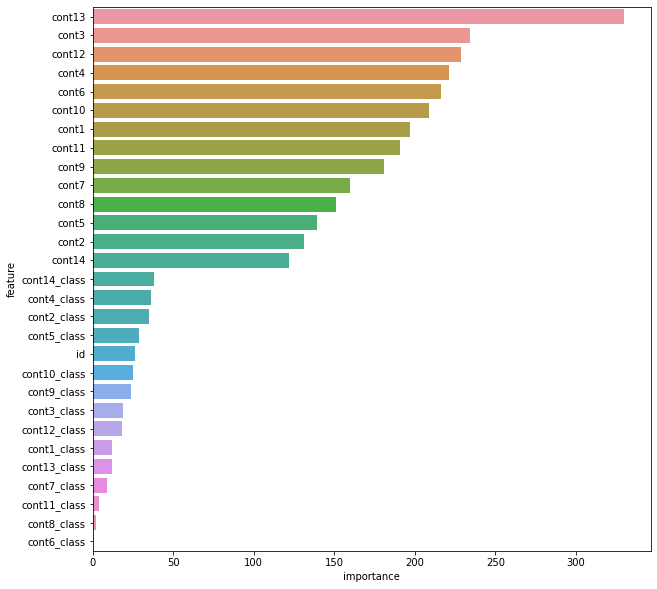

In [214]:
if __name__ == "__main__":
    X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
        xtrain, 
        ytrain, 
        test_size=0.2,
    )
    X_test = xtest
    
    model = lgb.LGBMRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = metrics.mean_squared_error(y_valid, preds)
    rmse = np.sqrt(metrics.mean_squared_error(y_valid, preds))
    print(f"{mse:.4f}, {rmse:.4f}")
    
    importance = pd.DataFrame()
    importance["feature"] = xtrain.columns
    importance["importance"] = model.feature_importances_
    importance = importance.sort_values(by=["importance"], ascending=False)
    
    plt.figure(figsize=(10,10))
    sns.barplot(data=importance, x="importance", y="feature");
    
    y_test_preds = model.predict(X_test)
    submission = pd.DataFrame()
    submission["id"] = X_test.loc[:,"id"]
    submission["target"] = y_test_preds
    print(submission.head())

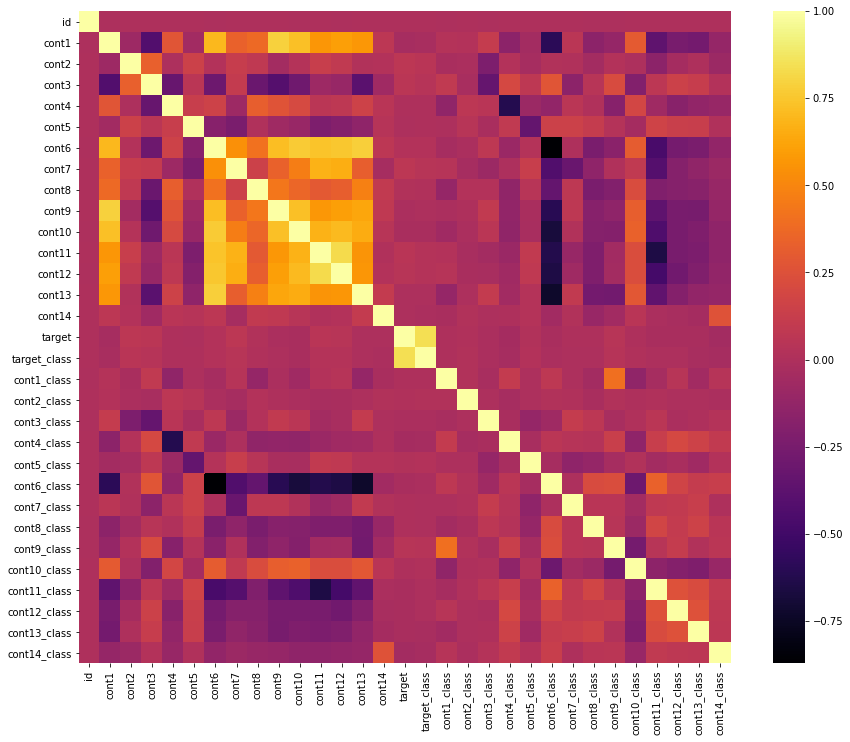

In [215]:
corr = train.corr()

plt.subplots(figsize=(15,12))
sns.heatmap(corr, cmap="inferno", square=True);

In [216]:
import numpy as np

a = np.arange(9).reshape((3, 3))
print(a)
print("-"*10)
print(np.where(a < 4, -1, 100))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
----------
[[ -1  -1  -1]
 [ -1 100 100]
 [100 100 100]]


In [217]:
for j in range(1,15):
    for i in range(train.cont1_class.nunique()):
        train[f"cont{j}_class_{i+1}"] = np.where(
            train[f"cont{j}_class"]==(i+1),
            train[f"cont{j}"],
            np.nan,
        )
        test[f"cont{j}_class_{i+1}"] = np.where(
            test[f"cont{j}_class"]==(i+1),
            test[f"cont{j}"],
            np.nan,
        )

In [218]:
train.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'target', 'target_class', 'cont1_class', 'cont2_class', 'cont3_class',
       'cont4_class', 'cont5_class', 'cont6_class', 'cont7_class',
       'cont8_class', 'cont9_class', 'cont10_class', 'cont11_class',
       'cont12_class', 'cont13_class', 'cont14_class', 'cont1_class_1',
       'cont1_class_2', 'cont1_class_3', 'cont1_class_4', 'cont2_class_1',
       'cont2_class_2', 'cont2_class_3', 'cont2_class_4', 'cont3_class_1',
       'cont3_class_2', 'cont3_class_3', 'cont3_class_4', 'cont4_class_1',
       'cont4_class_2', 'cont4_class_3', 'cont4_class_4', 'cont5_class_1',
       'cont5_class_2', 'cont5_class_3', 'cont5_class_4', 'cont6_class_1',
       'cont6_class_2', 'cont6_class_3', 'cont6_class_4', 'cont7_class_1',
       'cont7_class_2', 'cont7_class_3', 'cont7_class_4', 'cont8_class_1',
       'cont8_class_2', 'cont8_class_3

In [219]:
test.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'cont1_class', 'cont2_class', 'cont3_class', 'cont4_class',
       'cont5_class', 'cont6_class', 'cont7_class', 'cont8_class',
       'cont9_class', 'cont10_class', 'cont11_class', 'cont12_class',
       'cont13_class', 'cont14_class', 'cont1_class_1', 'cont1_class_2',
       'cont1_class_3', 'cont1_class_4', 'cont2_class_1', 'cont2_class_2',
       'cont2_class_3', 'cont2_class_4', 'cont3_class_1', 'cont3_class_2',
       'cont3_class_3', 'cont3_class_4', 'cont4_class_1', 'cont4_class_2',
       'cont4_class_3', 'cont4_class_4', 'cont5_class_1', 'cont5_class_2',
       'cont5_class_3', 'cont5_class_4', 'cont6_class_1', 'cont6_class_2',
       'cont6_class_3', 'cont6_class_4', 'cont7_class_1', 'cont7_class_2',
       'cont7_class_3', 'cont7_class_4', 'cont8_class_1', 'cont8_class_2',
       'cont8_class_3', 'cont8_class_4', 'cont9

0.4942, 0.7030
   id    target
0   0  8.036194
1   2  7.849328
2   6  7.889716
3   7  8.176788
4  10  8.197126


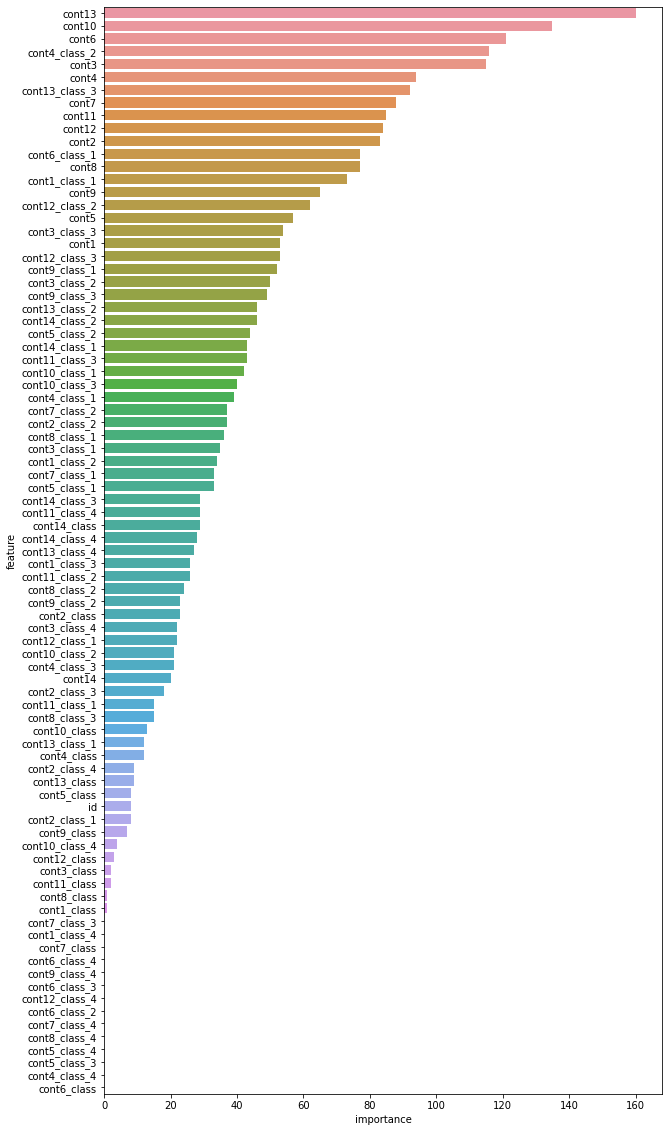

In [222]:
xtrain = train.drop(["target", "target_class"], axis=1)
ytrain = train["target"]
xtest = test

if __name__ == "__main__":
    X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
        xtrain, 
        ytrain, 
        test_size=0.2,
    )
    X_test = xtest
    
    model = lgb.LGBMRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = metrics.mean_squared_error(y_valid, preds)
    rmse = np.sqrt(metrics.mean_squared_error(y_valid, preds))
    print(f"{mse:.4f}, {rmse:.4f}")
    
    importance = pd.DataFrame()
    importance["feature"] = xtrain.columns
    importance["importance"] = model.feature_importances_
    importance = importance.sort_values(by=["importance"], ascending=False)
    
    plt.figure(figsize=(10,20))
    sns.barplot(data=importance, x="importance", y="feature");
    
    y_test_preds = model.predict(X_test)
    submission = pd.DataFrame()
    submission["id"] = X_test.loc[:,"id"]
    submission["target"] = y_test_preds
    print(submission.head())

In [223]:
for i in range(1,15):
    train[f"cont{i}_bin_10"] = pd.cut(
        train[f"cont{1}"],
        bins=10,
        labels=False,
    )
    test[f"cont{i}_bin_10"] = pd.cut(
        test[f"cont{1}"],
        bins=10,
        labels=False,
    )

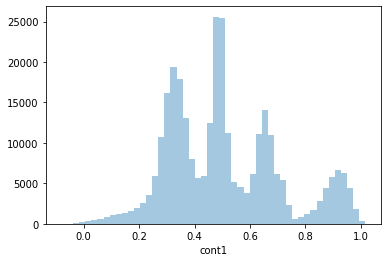

In [224]:
sns.distplot(train["cont1"], kde=False);

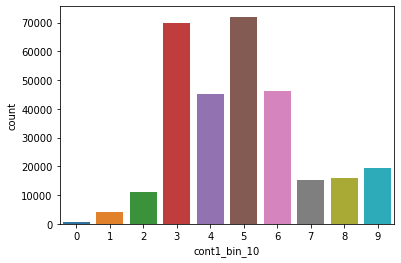

In [225]:
sns.countplot(train["cont1_bin_10"]);

In [226]:
train = train.drop([
    'cont1_class', 
    'cont2_class', 
    'cont3_class',
    'cont4_class', 
    'cont5_class', 
    'cont6_class', 
    'cont7_class',
    'cont8_class', 
    'cont9_class', 
    'cont10_class', 
    'cont11_class',
    'cont12_class', 
    'cont13_class', 
    'cont14_class', 
    'cont1_class_1',
    'cont1_class_2', 
    'cont1_class_3', 
    'cont1_class_4', 
    'cont2_class_1',
    'cont2_class_2', 
    'cont2_class_3', 
    'cont2_class_4', 
    'cont3_class_1',
    'cont3_class_2', 
    'cont3_class_3', 
    'cont3_class_4', 
    'cont4_class_1',
    'cont4_class_2', 
    'cont4_class_3', 
    'cont4_class_4', 
    'cont5_class_1',
    'cont5_class_2',
    'cont5_class_3', 
    'cont5_class_4', 
    'cont6_class_1',
    'cont6_class_2', 
    'cont6_class_3', 
    'cont6_class_4', 
    'cont7_class_1',
    'cont7_class_2', 
    'cont7_class_3',
    'cont7_class_4', 
    'cont8_class_1',
    'cont8_class_2', 
    'cont8_class_3', 
    'cont8_class_4', 
    'cont9_class_1',
    'cont9_class_2', 
    'cont9_class_3', 
    'cont9_class_4', 
    'cont10_class_1',
    'cont10_class_2', 
    'cont10_class_3', 
    'cont10_class_4', 
    'cont11_class_1',
    'cont11_class_2', 
    'cont11_class_3', 
    'cont11_class_4', 
    'cont12_class_1',
    'cont12_class_2', 
    'cont12_class_3', 
    'cont12_class_4', 
    'cont13_class_1',
    'cont13_class_2', 
    'cont13_class_3', 
    'cont13_class_4', 
    'cont14_class_1',
    'cont14_class_2', 
    'cont14_class_3', 
    'cont14_class_4',
], axis=1)

train.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'target', 'target_class', 'cont1_bin_10', 'cont2_bin_10',
       'cont3_bin_10', 'cont4_bin_10', 'cont5_bin_10', 'cont6_bin_10',
       'cont7_bin_10', 'cont8_bin_10', 'cont9_bin_10', 'cont10_bin_10',
       'cont11_bin_10', 'cont12_bin_10', 'cont13_bin_10', 'cont14_bin_10'],
      dtype='object')

In [227]:
test = test.drop([
    'cont1_class', 
    'cont2_class', 
    'cont3_class',
    'cont4_class', 
    'cont5_class', 
    'cont6_class', 
    'cont7_class',
    'cont8_class', 
    'cont9_class', 
    'cont10_class', 
    'cont11_class',
    'cont12_class', 
    'cont13_class', 
    'cont14_class', 
    'cont1_class_1',
    'cont1_class_2', 
    'cont1_class_3', 
    'cont1_class_4', 
    'cont2_class_1',
    'cont2_class_2', 
    'cont2_class_3', 
    'cont2_class_4', 
    'cont3_class_1',
    'cont3_class_2', 
    'cont3_class_3', 
    'cont3_class_4', 
    'cont4_class_1',
    'cont4_class_2', 
    'cont4_class_3', 
    'cont4_class_4', 
    'cont5_class_1',
    'cont5_class_2',
    'cont5_class_3', 
    'cont5_class_4', 
    'cont6_class_1',
    'cont6_class_2', 
    'cont6_class_3', 
    'cont6_class_4', 
    'cont7_class_1',
    'cont7_class_2', 
    'cont7_class_3',
    'cont7_class_4', 
    'cont8_class_1',
    'cont8_class_2', 
    'cont8_class_3', 
    'cont8_class_4', 
    'cont9_class_1',
    'cont9_class_2', 
    'cont9_class_3', 
    'cont9_class_4', 
    'cont10_class_1',
    'cont10_class_2', 
    'cont10_class_3', 
    'cont10_class_4', 
    'cont11_class_1',
    'cont11_class_2', 
    'cont11_class_3', 
    'cont11_class_4', 
    'cont12_class_1',
    'cont12_class_2', 
    'cont12_class_3', 
    'cont12_class_4', 
    'cont13_class_1',
    'cont13_class_2', 
    'cont13_class_3', 
    'cont13_class_4', 
    'cont14_class_1',
    'cont14_class_2', 
    'cont14_class_3', 
    'cont14_class_4',
], axis=1)

test.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'cont1_bin_10', 'cont2_bin_10', 'cont3_bin_10', 'cont4_bin_10',
       'cont5_bin_10', 'cont6_bin_10', 'cont7_bin_10', 'cont8_bin_10',
       'cont9_bin_10', 'cont10_bin_10', 'cont11_bin_10', 'cont12_bin_10',
       'cont13_bin_10', 'cont14_bin_10'],
      dtype='object')

0.4967, 0.7047
   id    target
0   0  8.008652
1   2  7.785587
2   6  7.913441
3   7  8.135910
4  10  8.238545


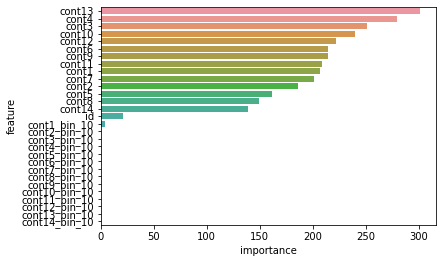

In [228]:
xtrain = train.drop(["target", "target_class"], axis=1)
ytrain = train["target"]
xtest = test

if __name__ == "__main__":
    X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
        xtrain, 
        ytrain, 
        test_size=0.2,
    )
    X_test = xtest
    
    model = lgb.LGBMRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = metrics.mean_squared_error(y_valid, preds)
    rmse = np.sqrt(metrics.mean_squared_error(y_valid, preds))
    print(f"{mse:.4f}, {rmse:.4f}")
    
    importance = pd.DataFrame()
    importance["feature"] = xtrain.columns
    importance["importance"] = model.feature_importances_
    importance = importance.sort_values(by=["importance"], ascending=False)
    
    sns.barplot(data=importance, x="importance", y="feature");
    
    y_test_preds = model.predict(X_test)
    submission = pd.DataFrame()
    submission["id"] = X_test.loc[:,"id"]
    submission["target"] = y_test_preds
    print(submission.head())

In [229]:
train = train.drop([
    'cont1_bin_10', 
    'cont2_bin_10',
    'cont3_bin_10', 
    'cont4_bin_10', 
    'cont5_bin_10', 
    'cont6_bin_10',
    'cont7_bin_10', 
    'cont8_bin_10', 
    'cont9_bin_10', 
    'cont10_bin_10',
    'cont11_bin_10', 
    'cont12_bin_10', 
    'cont13_bin_10', 
    'cont14_bin_10',
], axis=1)

train.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14',
       'target', 'target_class'],
      dtype='object')

In [230]:
test = test.drop([
    'cont1_bin_10', 
    'cont2_bin_10',
    'cont3_bin_10', 
    'cont4_bin_10', 
    'cont5_bin_10', 
    'cont6_bin_10',
    'cont7_bin_10', 
    'cont8_bin_10', 
    'cont9_bin_10', 
    'cont10_bin_10',
    'cont11_bin_10', 
    'cont12_bin_10', 
    'cont13_bin_10', 
    'cont14_bin_10',
], axis=1)

test.columns

Index(['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14'],
      dtype='object')

In [234]:
features = [f for f in train.columns if f not in ("id", "target", "target_class")]

train["sum"] = train[features].sum(axis=1)
train["mean"] = train[features].mean(axis=1)
train["min"] = train[features].min(axis=1)
train["max"] = train[features].max(axis=1)
train["std"] = train[features].std(axis=1)
train["var"] = train[features].var(axis=1)

test["sum"] = test[features].sum(axis=1)
test["mean"] = test[features].mean(axis=1)
test["min"] = test[features].min(axis=1)
test["max"] = test[features].max(axis=1)
test["std"] = test[features].std(axis=1)
test["var"] = test[features].var(axis=1)

0.4965, 0.7046
   id    target
0   0  7.935602
1   2  7.780125
2   6  7.908774
3   7  8.173482
4  10  8.256297


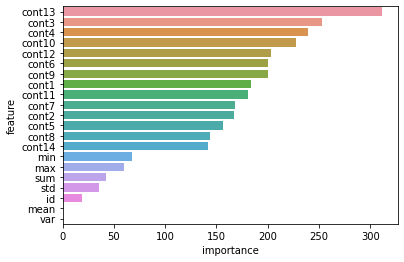

In [236]:
xtrain = train.drop(["target", "target_class"], axis=1)
ytrain = train["target"]
xtest = test

if __name__ == "__main__":
    X_train, X_valid, y_train, y_valid = model_selection.train_test_split(
        xtrain, 
        ytrain, 
        test_size=0.2,
    )
    X_test = xtest
    
    model = lgb.LGBMRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = metrics.mean_squared_error(y_valid, preds)
    rmse = np.sqrt(metrics.mean_squared_error(y_valid, preds))
    print(f"{mse:.4f}, {rmse:.4f}")
    
    importance = pd.DataFrame()
    importance["feature"] = xtrain.columns
    importance["importance"] = model.feature_importances_
    importance = importance.sort_values(by=["importance"], ascending=False)
    
    sns.barplot(data=importance, x="importance", y="feature");
    
    y_test_preds = model.predict(X_test)
    submission = pd.DataFrame()
    submission["id"] = X_test.loc[:,"id"]
    submission["target"] = y_test_preds
    print(submission.head())